In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
LOVE_WORDS = {"love", "adore", "heart", "cherish", "wonderful", "passion", "sweet", "happy", "joy"}
HATE_WORDS = {"hate", "detest", "awful", "kill", "pain", "worst", "enemy", "nasty", "gross"}

def calculate_sentiment_score(text):
    """
    Calculates a simple normalized sentiment score.
    Score = (Positive Words - Negative Words) / Total Words
    Range is roughly -1 to 1.
    """
    if not text:
        return 0.0
    
    words = text.lower().replace('.', '').replace(',', '').split()
    total_words = len(words)
    
    if total_words == 0:
        return 0.0
        
    love_count = sum(1 for w in words if w in LOVE_WORDS)
    hate_count = sum(1 for w in words if w in HATE_WORDS)
    
    # We return a normalized score
    return (love_count - hate_count) / total_words


In [3]:
def test_metrics():
    print("Running metric tests...")
    
    # Case 1: Pure Love
    score_1 = calculate_sentiment_score("I love this wonderful world")
    assert score_1 > 0, f"Failed: Expected positive score, got {score_1}"
    
    # Case 2: Pure Hate
    score_2 = calculate_sentiment_score("I hate this awful pain")
    assert score_2 < 0, f"Failed: Expected negative score, got {score_2}"
    
    # Case 3: Mixed/Neutral
    score_3 = calculate_sentiment_score("I love to hate you")
    assert score_3 == 0, f"Failed: Expected 0 (cancel out), got {score_3}"
    
    print("✅ All metric tests passed.")

test_metrics()


Running metric tests...
✅ All metric tests passed.


In [4]:
def generate_mock_data(n_samples=50):
    data = []
    
    # Steering coefficients from -10 to 10
    coefficients = sorted([random.randint(-10, 10) for _ in range(n_samples)])
    
    for coeff in coefficients:
        # SIMULATION LOGIC:
        # If coeff is high (+), model generates 'love' words.
        # If coeff is low (-), model generates 'hate' words.
        
        base_sentence = "The object is "
        
        if coeff > 5:
            generated = base_sentence + f"absolutely {random.choice(list(LOVE_WORDS))} and {random.choice(list(LOVE_WORDS))}."
        elif coeff > 0:
            generated = base_sentence + f"quite {random.choice(list(LOVE_WORDS))}."
        elif coeff < -5:
            generated = base_sentence + f"truly {random.choice(list(HATE_WORDS))} and {random.choice(list(HATE_WORDS))}."
        elif coeff < 0:
            generated = base_sentence + f"somewhat {random.choice(list(HATE_WORDS))}."
        else:
            generated = base_sentence + "neutral and okay."
            
        data.append({
            "steering_coeff": coeff,
            "generated_text": generated
        })
        
    return pd.DataFrame(data)


In [5]:
df = generate_mock_data(100)
print(f"Generated {len(df)} samples.")
df.head()


Generated 100 samples.


,steering_coeff,generated_text
0,-10,The object is truly worst and nasty.
1,-10,The object is truly enemy and awful.
2,-10,The object is truly pain and awful.
3,-9,The object is truly hate and kill.
4,-9,The object is truly kill and worst.


In [6]:
df['sentiment_score'] = df['generated_text'].apply(calculate_sentiment_score)
df.head()


,steering_coeff,generated_text,sentiment_score
0,-10,The object is truly worst and nasty.,-0.285714
1,-10,The object is truly enemy and awful.,-0.285714
2,-10,The object is truly pain and awful.,-0.285714
3,-9,The object is truly hate and kill.,-0.285714
4,-9,The object is truly kill and worst.,-0.285714


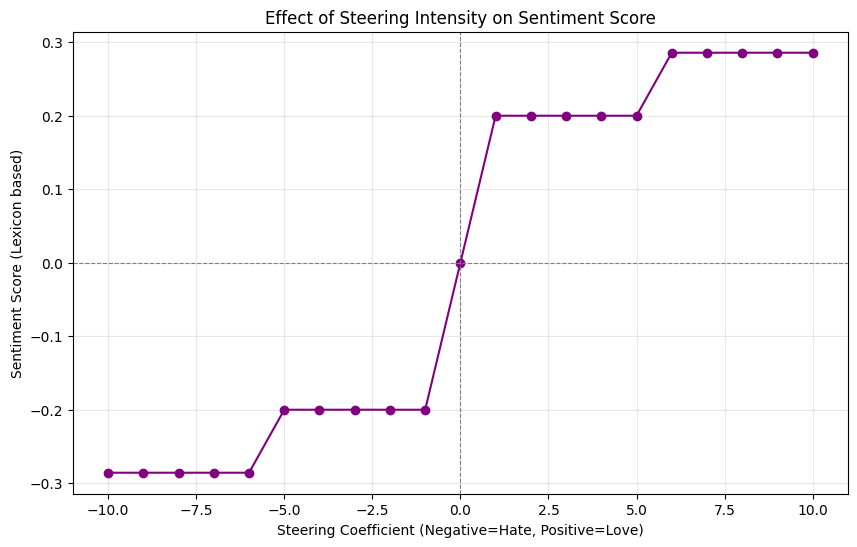

In [7]:
plt.figure(figsize=(10, 6))
# Calculate mean score per coefficient to see the trend clearly
trend = df.groupby('steering_coeff')['sentiment_score'].mean()

plt.plot(trend.index, trend.values, marker='o', linestyle='-', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.title("Effect of Steering Intensity on Sentiment Score")
plt.xlabel("Steering Coefficient (Negative=Hate, Positive=Love)")
plt.ylabel("Sentiment Score (Lexicon based)")
plt.grid(True, alpha=0.3)
plt.show()


In [8]:
def manual_review(steering_range):
    # Unpack the tuple automatically provided by IntRangeSlider
    min_coeff, max_coeff = steering_range
    
    # Filter data
    subset = df[(df['steering_coeff'] >= min_coeff) & (df['steering_coeff'] <= max_coeff)]
    
    print(f"Showing {len(subset)} samples for range [{min_coeff}, {max_coeff}]:\n")
    
    if subset.empty:
        print("No samples found in this range.")
        return

    # Display clean table
    # We use styling to highlight sentiment (Green=Love, Red=Hate)
    display(subset[['steering_coeff', 'generated_text', 'sentiment_score']].style.background_gradient(subset=['sentiment_score'], cmap='RdYlGn', vmin=-1, vmax=1))

# Create interactive widget
# Ranges match our mock data (-10 to 10)
coeff_slider = widgets.IntRangeSlider(
    value=[-10, -5],
    min=-10,
    max=10,
    step=1,
    description='Steering Range:',
    continuous_update=False,
    layout=widgets.Layout(width='600px')
)

ui = widgets.VBox([widgets.Label("Select Steering Intensity Range to Review Output:"), coeff_slider])

# interactive_output automatically binds the slider value (tuple) to the function argument
out = widgets.interactive_output(manual_review, {'steering_range': coeff_slider})

display(ui, out)

Output()